# Interactive parameters
In this notebook, we use the ipywidget in jupyter notebook to play with score threshold and maximal overlap.

In [1]:
%matplotlib notebook
from ipywidgets import interact
import mtm
print("mtm version : ", mtm.__version__)

from mtm import matchTemplates
from mtm.detection import BoundingBox

from skimage import io, draw, morphology, color
import matplotlib.pyplot as plt
import numpy as np

mtm version :  1.0.1


Let's open one image from the Zenodo repo using scikit-image

<IPython.core.display.Javascript object>


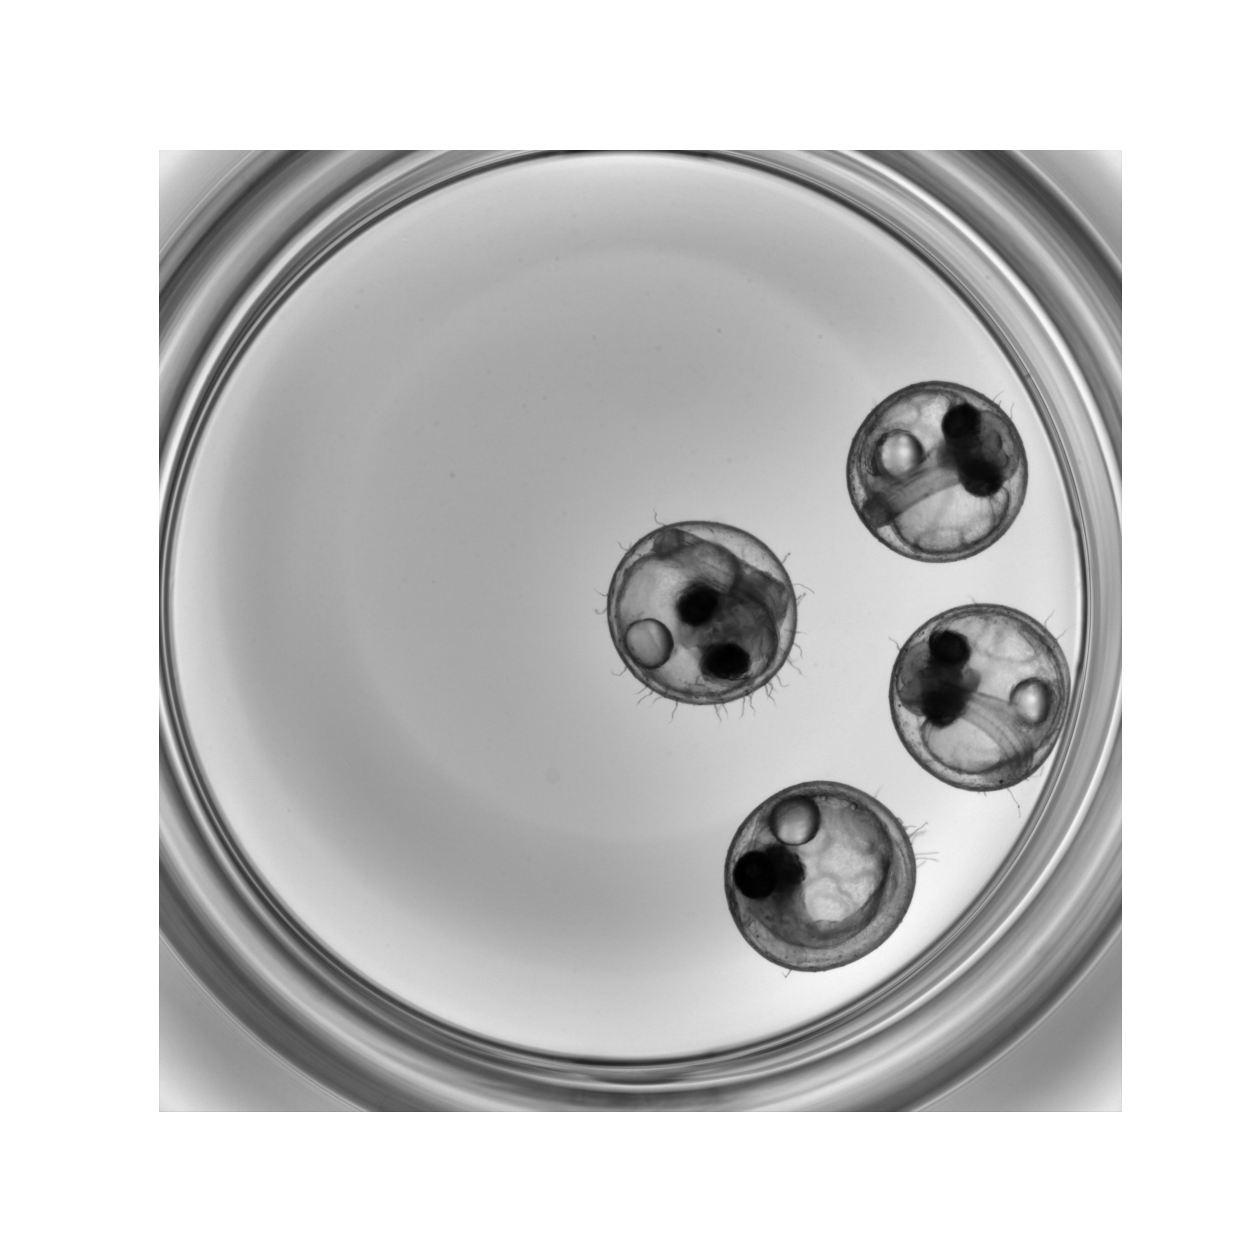

In [2]:
plt.figure("Image", figsize = (5,5))
URL = r"https://zenodo.org/record/2650147/files/WE00049---E001--PO01--LO001--CO6--00000000_00.01.00_00.16.00%2C000.jpg"
image = io.imread(URL)
plt.axis("off")
plt.imshow(image, cmap="gray")

Let's crop one embryo to use as a template

<IPython.core.display.Javascript object>


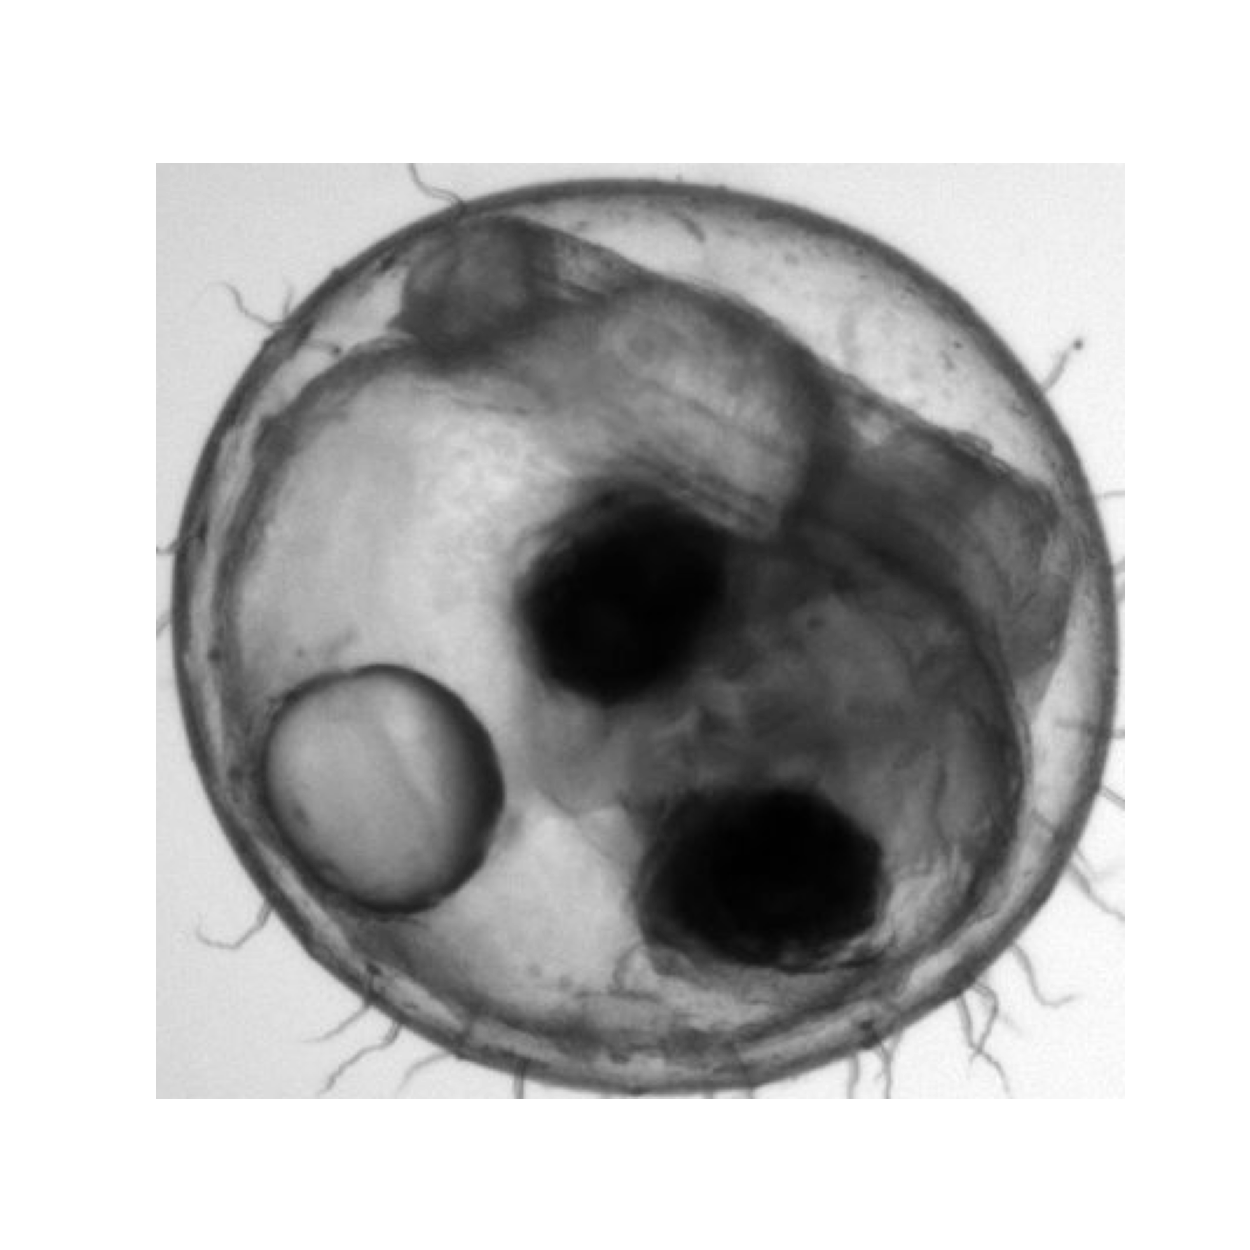

In [3]:
plt.figure("Template", figsize = (5,5))
temp0 = image[784:784+400, 946:946+414] # with well 49 
plt.axis("off")
plt.imshow(temp0, cmap="gray")

We generate 2 additional templates by rotating the initial template.

<IPython.core.display.Javascript object>


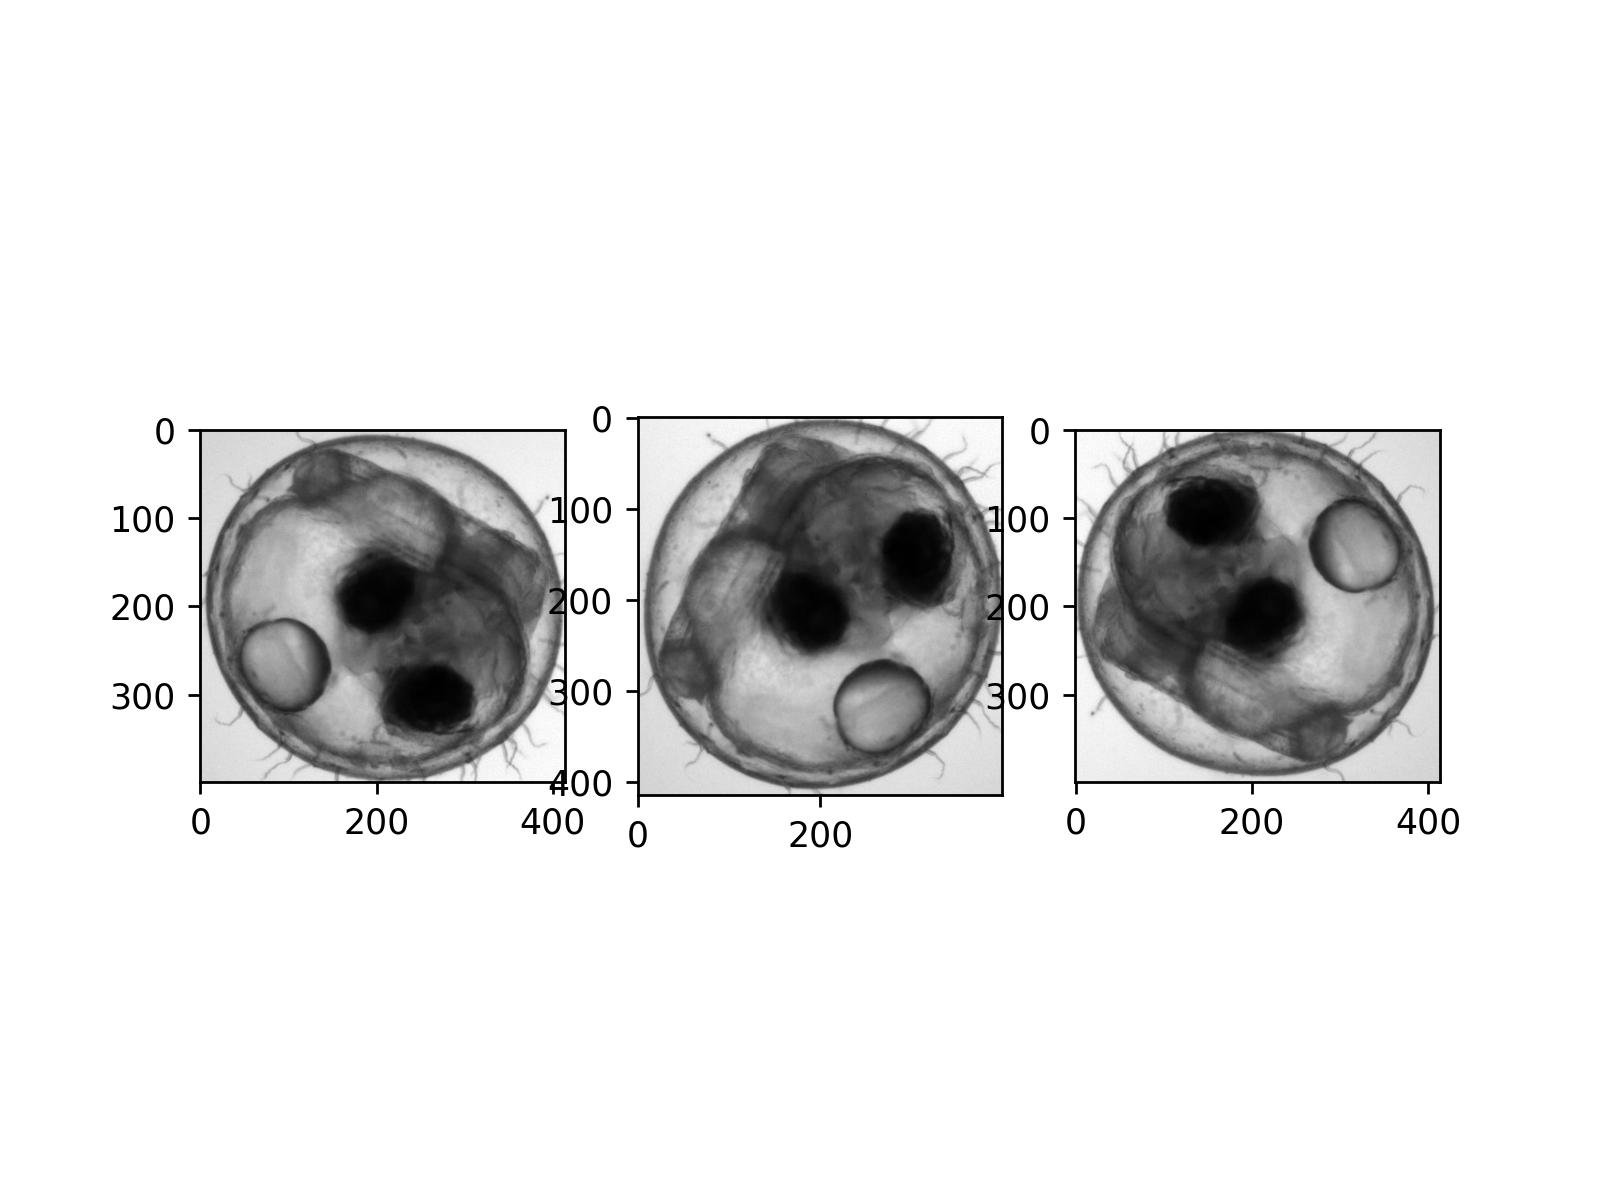

In [4]:
## Perform rotation of the initial template
temp0 = image[784:784+400, 946:946+414] # with well 49 
plt.axis("off")
plt.imshow(temp0, cmap="gray")

listTemplate = [temp0]
listLabels = ["0"]

# Initialise figure
f, axarr = plt.subplots(1,3)
axarr[0].imshow(temp0, cmap="gray")

for i,angle in enumerate([90,180]):
    rotated = np.rot90(temp0, k=i+1) # NB: rotate not good here, turns into float!
    listTemplate.append(rotated)
    listLabels.append(str(angle))
    axarr[i+1].imshow(rotated, cmap="gray")
    
    # We could also do some flipping with np.fliplr, flipud

Play with the sliders to visualize the effect of those parameters on the number of detections.  
In particular reducing the score threshold increases the number of detections (fasle positives),  
while increasing the allowed overlap yield redundant detections.

<IPython.core.display.Javascript object>


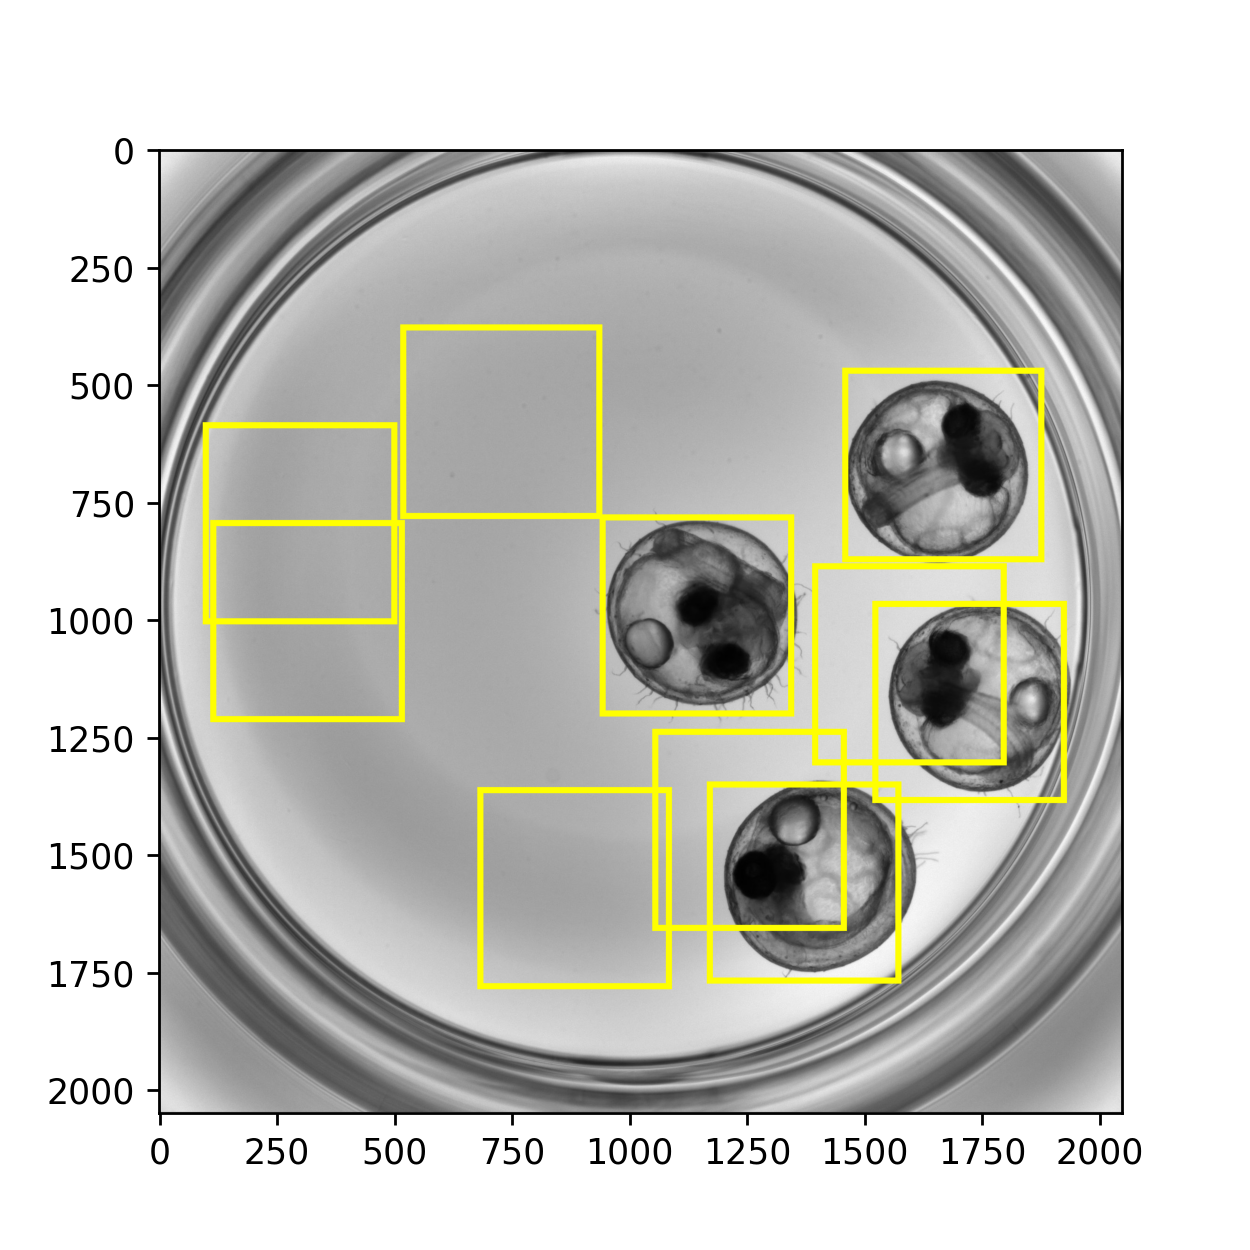

interactive(children=(IntSlider(value=4, description='nObjects', max=10), FloatSlider(value=0.5, description='…

In [5]:
plt.figure("Multi-Template Matching", figsize = (5,5))

@interact( nObjects=(0,10,1), scoreThreshold=(0, 1, 0.05), maxOverlap=(0, 1, 0.1), thickness=(1,20,1) )
def runDetection(nObjects=4, scoreThreshold=0.5, maxOverlap=0.4, thickness = 5):
    
    Hits = matchTemplates(image,
                          listTemplate,
                          listLabels,
                          scoreThreshold, 
                          maxOverlap,
                          nObjects,
                          downscalingFactor=4)

    overlay = np.zeros(np.shape(image))
    for detection in Hits:
        (x,y,w,h) = detection.get_xywh()
        rr,cc = draw.rectangle_perimeter((y,x), extent=(w,h))
        overlay[rr,cc] = 1
    dilated_overlay = morphology.dilation(overlay, morphology.square(thickness))
    binary = dilated_overlay > 0
    imageoverlaid = color.gray2rgb(image)
    imageoverlaid[binary] = (255,255,0)
    plt.cla()
    plt.imshow(imageoverlaid)
    
    for detection in Hits:
        print(detection)